<h1>Start Session<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# import common libraries
%load_ext autoreload
%autoreload 2

#%matplotlib notebook
%matplotlib inline

In [ ]:
# this is to install lightgbm
#import sys
#!{sys.executable} -m pip install lightgbm

In [2]:
import os
import os.path
import numpy as np
import lightgbm

# Train LightGBM and optimize NDCG

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Read dataset from file

train_file = "/content/drive/MyDrive/STBI/MQ2008/Fold1/train.txt"

if not os.path.exists(train_file) or not os.path.isfile(train_file):
    raise FileNotFoundError("'" + train_file + "': no such file")

In [5]:
from sklearn.datasets import load_svmlight_file
# see http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_svmlight_file.html

train_data = load_svmlight_file(train_file, query_id=True)

In [6]:
print ("X shape:", train_data[0].shape )
print ("Y shape:", train_data[1].shape )
print ("qid shape: ", train_data[2].shape )

X shape: (9630, 46)
Y shape: (9630,)
qid shape:  (9630,)


In [7]:
# Make it a LightGBM dataset

import itertools

query_lens = [ sum( 1 for _ in group ) for key, group in itertools.groupby( train_data[2] )  ]
train_lgb = lightgbm.Dataset(data=train_data[0], label=train_data[1], group=query_lens)


In [8]:
# Set training parameters
# see http://lightgbm.readthedocs.io/en/latest/Parameters.html

params = {
    'objective':'lambdarank', # what to optimize during training
    'max_position': 10,      # threshold used in optimizing lamdarank (NDCG)
    'learning_rate': 0.1,
    'num_leaves': 32,
    'min_data_in_leaf': 5,
    'metric': ['ndcg'],       # what to use/print for evaluation
    'ndcg_eval_at': 10
}    

lgbm_model = lightgbm.train(params, train_lgb, 
                            num_boost_round=100,
                            valid_sets = [train_lgb], 
                            verbose_eval=True)

[1]	training's ndcg@10: 0.792431
[2]	training's ndcg@10: 0.828789
[3]	training's ndcg@10: 0.847234
[4]	training's ndcg@10: 0.853712
[5]	training's ndcg@10: 0.858008
[6]	training's ndcg@10: 0.863276
[7]	training's ndcg@10: 0.869581
[8]	training's ndcg@10: 0.872745
[9]	training's ndcg@10: 0.872073
[10]	training's ndcg@10: 0.875194
[11]	training's ndcg@10: 0.879259
[12]	training's ndcg@10: 0.880706
[13]	training's ndcg@10: 0.880826
[14]	training's ndcg@10: 0.884108
[15]	training's ndcg@10: 0.886859
[16]	training's ndcg@10: 0.88793
[17]	training's ndcg@10: 0.888249
[18]	training's ndcg@10: 0.889244
[19]	training's ndcg@10: 0.8926
[20]	training's ndcg@10: 0.89266
[21]	training's ndcg@10: 0.895821
[22]	training's ndcg@10: 0.896886
[23]	training's ndcg@10: 0.899679
[24]	training's ndcg@10: 0.900608
[25]	training's ndcg@10: 0.900963
[26]	training's ndcg@10: 0.904044
[27]	training's ndcg@10: 0.90526
[28]	training's ndcg@10: 0.907496
[29]	training's ndcg@10: 0.909472
[30]	training's ndcg@10: 0.9

In [10]:
# A more reasonable setting: train/valid/test

import itertools
from sklearn.datasets import load_svmlight_file
# see http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_svmlight_file.html


train_file = "/content/drive/MyDrive/STBI/MQ2008/Fold1/train.txt"
valid_file = "/content/drive/MyDrive/STBI/MQ2008/Fold1/vali.txt"
test_file  = "/content/drive/MyDrive/STBI/MQ2008/Fold1/test.txt"

# train
raw_data = load_svmlight_file(train_file, query_id=True)
query_lens = [ sum( 1 for _ in group ) for key, group in itertools.groupby( raw_data[2] )  ]
train_lgb = lightgbm.Dataset(data=raw_data[0], label=raw_data[1], group=query_lens)

# valid
raw_data = load_svmlight_file(valid_file, query_id=True)
query_lens = [ sum( 1 for _ in group ) for key, group in itertools.groupby( raw_data[2] )  ]
valid_lgb = lightgbm.Dataset(data=raw_data[0], label=raw_data[1], group=query_lens)

# test
raw_data = load_svmlight_file(test_file, query_id=True)
query_lens = [ sum( 1 for _ in group ) for key, group in itertools.groupby( raw_data[2] )  ]
test_lgb = lightgbm.Dataset(data=raw_data[0], label=raw_data[1], group=query_lens)


In [11]:
params = {
    'objective':'lambdarank', # what to optimize during training
    'max_position': 10,      # threshold used in optimizing lamdarank (NDCG)
    'learning_rate': 0.1,
    'num_leaves': 16,
    'min_data_in_leaf': 5,
    'metric': ['ndcg'],       # what to use/print for evaluation
    'ndcg_eval_at': 10
}    

lgbm_info = {}

lgbm_model = lightgbm.train(params, train_lgb, num_boost_round=200,
                            valid_sets   = [train_lgb, valid_lgb, test_lgb], 
                            valid_names  = ["train", "valid", "test"],
                            evals_result = lgbm_info,
                            verbose_eval = 10)


lgbm_info

[10]	train's ndcg@10: 0.839635	valid's ndcg@10: 0.769412	test's ndcg@10: 0.78793
[20]	train's ndcg@10: 0.858442	valid's ndcg@10: 0.768003	test's ndcg@10: 0.809687
[30]	train's ndcg@10: 0.868135	valid's ndcg@10: 0.758846	test's ndcg@10: 0.810116
[40]	train's ndcg@10: 0.880562	valid's ndcg@10: 0.763718	test's ndcg@10: 0.812828
[50]	train's ndcg@10: 0.88878	valid's ndcg@10: 0.764722	test's ndcg@10: 0.808198
[60]	train's ndcg@10: 0.896391	valid's ndcg@10: 0.768509	test's ndcg@10: 0.807335
[70]	train's ndcg@10: 0.904135	valid's ndcg@10: 0.775763	test's ndcg@10: 0.807366
[80]	train's ndcg@10: 0.912361	valid's ndcg@10: 0.776654	test's ndcg@10: 0.808082
[90]	train's ndcg@10: 0.919227	valid's ndcg@10: 0.776834	test's ndcg@10: 0.805053
[100]	train's ndcg@10: 0.928806	valid's ndcg@10: 0.775739	test's ndcg@10: 0.803168
[110]	train's ndcg@10: 0.93513	valid's ndcg@10: 0.774736	test's ndcg@10: 0.79975
[120]	train's ndcg@10: 0.938058	valid's ndcg@10: 0.774574	test's ndcg@10: 0.797666
[130]	train's ndc

{'test': defaultdict(list,
             {'ndcg@10': [0.7952764313085512,
               0.800328502787406,
               0.7964785584500004,
               0.8052156088136928,
               0.7944045269492715,
               0.8005728223318028,
               0.7995164541228593,
               0.7939404571416022,
               0.7833989868905085,
               0.787929758754802,
               0.7924520636071134,
               0.7945805744690825,
               0.7976240049702557,
               0.8019659199256713,
               0.8010093915843747,
               0.8025603258002011,
               0.8072609272527546,
               0.8128759204652014,
               0.8081553575263644,
               0.8096874616205605,
               0.8105303544462629,
               0.8072925129832844,
               0.8077434290004137,
               0.8033775142306134,
               0.8098856501868145,
               0.8066637881527007,
               0.8112883473378694,
               0.80

Text(0.5, 1.0, 'Model Error')

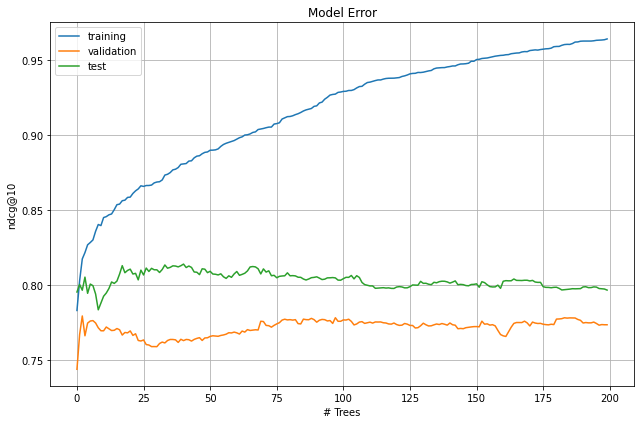

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6), tight_layout=True)

plt.plot(lgbm_info['train']['ndcg@10'], label='training')
plt.plot(lgbm_info['valid']['ndcg@10'], label='validation')
plt.plot(lgbm_info['test']['ndcg@10'], label='test')

plt.grid()
plt.legend()
plt.xlabel("# Trees")
plt.ylabel("ndcg@10")
plt.title("Model Error")

## **BoltzRank logic**

In [19]:
%load_ext Cython

In [21]:
%%cython 
from libc.math cimport exp
from cython.parallel import prange
from cython import boundscheck, wraparound, cdivision
from libc.math cimport log
from math import factorial
import numpy as np
cimport numpy as np
from libc.stdio cimport printf
from libc.stdlib cimport malloc
from libc.stdlib cimport free

# Energy function.
# params: 
#  R      the ranking to evaluate. Element i contains the id of the document in position i
#  S      the scoring vector. Element i contains the score of the document with id i
# returns:
#  a c matrix of size (m,2). Row i contains (energy, energy') w.r.t. document i
#  NB: call free on the returned matrix.
@boundscheck(False)
@wraparound(False)
cdef double** E(int[:] R, double[:] S) nogil:
    cdef int k, j, m = len(R)
    cdef double** energy = <double **> malloc(m*sizeof(double*)) # freed at 78
    cdef double derivative, first_sum, second_sum, factor
    if m == 1 or m == 0:
        for j in prange(len(R), schedule='static', num_threads=8):
            energy[j] = <double *> malloc(2*sizeof(double)) # freed at 77
            energy[j][0] = 0
            energy[j][1] = 0
    else:
        factor = 4.0 / (m * ((m - 1)**2))
        for j in prange(len(R), schedule='static', num_threads=8):
            energy[j] = <double *> malloc(2*sizeof(double)) # freed at 77
            derivative = 0.0
            first_sum = 0.0
            second_sum = 0.0
            for k in range(len(R)):
                if j > k:
                    derivative = derivative + (j - k)
                    first_sum = first_sum + (j - k) * (S[R[j]] - S[R[k]])
                elif k > j: 
                    derivative = derivative + (j - k)
                    second_sum = second_sum + (k - j) * (S[R[k]] - S[R[j]])
            energy[j][0] = factor * (first_sum + second_sum)
            energy[j][1] = factor * derivative
    return energy

# Probability function.
# params: 
#  Rq    the rank sample set. Element i contains the i-th ranking, that is, an array of document ids
#  S     the scoring vector. Element i contains the score of the document with id i
#  probs a c matrix of size (len(S),len(Rq),3). Each row i contains the result of the computation w.r.t. document i. Each row contains a 
#        matrix (len(Rq),3) containing, for each ranking, a tuple (probability, probability', probability'')
@boundscheck(False)
@wraparound(False)
cdef void P(int[:,:] Rq, double[:] S, double*** probs, double** accumulator) nogil:
    cdef int rankid, pos, doc
    cdef double** en
    
    for pos in range(len(Rq[0])):
        doc = Rq[0][pos]
        probs[doc] = <double **> malloc(len(Rq)*sizeof(double*)) # freed at 139
        accumulator[doc] = <double *> malloc(3*sizeof(double*)) # freed at 92
        accumulator[doc][0] = 0
        accumulator[doc][1] = 0
        accumulator[doc][2] = 0
        for rankid in prange(len(Rq), schedule='static', num_threads=8):
            probs[doc][rankid] = <double *> malloc(3*sizeof(double)) # freed at 138
    
    for rankid in prange(len(Rq), schedule='static', num_threads=8):
        en = E(Rq[rankid], S)
        for pos in range(len(Rq[rankid])):
            doc = Rq[rankid][pos]
            probs[doc][rankid][0] = exp(-en[pos][0]) # e^{-E}
            probs[doc][rankid][1] = 0
            probs[doc][rankid][2] = en[pos][1] # E'
            accumulator[doc][0] = accumulator[doc][0] + probs[doc][rankid][0] # sum(e^{-E})
            accumulator[doc][1] = accumulator[doc][1] + (-en[pos][1] * probs[doc][rankid][0]) # sum(-E' * e^{-E})
            accumulator[doc][2] = accumulator[doc][2] + ((en[pos][1]**2) * probs[doc][rankid][0]) # sum(E'^2 * e^{-E})
            free(en[pos]) # allocated at 28
        free(en) # allocated at 24

    for pos in prange(len(Rq[0]), schedule='static', num_threads=8):
        doc = Rq[0][pos]
        # e^{-E} / sum(e^{-E})
        probs[doc][rankid][0] = probs[doc][rankid][0] / accumulator[doc][0]
        
        # -P * (E' + (sum(-E' * e^{-E}) / sum(e^{-E})))
        probs[doc][rankid][1] = -probs[doc][rankid][0] * (probs[doc][rankid][2] + (accumulator[doc][1] / accumulator[doc][0]))
                
        # -P' * (E' + (sum(-E' * e^{-E}) / sum(e^{-E}))) - P * (1 + (sum(E'^2 * e^{-E}) / sum(-E' * e^{-E})) - (sum(-E' * e^{-E})^2 / sum(e^{-E})^2))
        probs[doc][rankid][2] = (-probs[doc][rankid][1] * (probs[doc][rankid][2] + (accumulator[doc][1] / accumulator[doc][0]))) 
        probs[doc][rankid][2] = probs[doc][rankid][2] + (-probs[doc][rankid][0] * (1 + ((accumulator[doc][2] / accumulator[doc][0]) - (accumulator[doc][1]**2 / accumulator[doc][0]**2))))
        
        free(accumulator[doc]) # allocated at 63
        
# Gain function.
# params: 
#  Rq                the rank sample set. Element i contains the i-th ranking, that is, an array of document ids
#  probs             a c matrix of size (len(S),len(Rq),3). Each row i contains the result of the computation w.r.t. document i. Each row contains a 
#                    matrix (len(Rq),3) containing, for each ranking, a tuple (probability, probability', probability'')
#  probs_with_labels a c matrix of size (len(S),len(Rq)). Each row i contains the result of the computation w.r.t. document i. Each row contains an 
#                    array (len(Rq)) containing, for each ranking, its probability w.r.t. the target labeling
#  gains             a c matrix of size (len(S),3) containing, for each document, the evaluated gain with its two derivatives. 
@boundscheck(False)
@wraparound(False)
cdef void monte_carlo_gain(int[:,:] Rq, double*** probs, double[:] ndcgs, double** gains) nogil:
    cdef int i, doc, j
    for i in prange(len(Rq[0]), schedule='static', num_threads=8):
        doc = Rq[0][i]
        gains[doc] = <double*> malloc(3*sizeof(double)) # freed at 163
        gains[doc][0] = 0
        gains[doc][1] = 0
        gains[doc][2] = 0
        for j in range(len(Rq)):
            gains[doc][0] = gains[doc][0] + probs[doc][j][0] * ndcgs[j]
            gains[doc][1] = gains[doc][1] + probs[doc][j][1] * ndcgs[j]
            gains[doc][2] = gains[doc][2] + probs[doc][j][2] * ndcgs[j]
        
# Cross entropy function.
# params: 
#  Rq                the rank sample set. Element i contains the i-th ranking, that is, an array of document ids
#  probs             a c matrix of size (len(S),len(Rq),3). Each row i contains the result of the computation w.r.t. document i. Each row contains a 
#                    matrix (len(Rq),3) containing, for each ranking, a tuple (probability, probability', probability'')
#  probs_with_labels a c matrix of size (len(S),len(Rq)). Each row i contains the result of the computation w.r.t. document i. Each row contains an 
#                    array (len(Rq)) containing, for each ranking, its probability w.r.t. the target labeling
#  entropies         a c matrix of size (len(S),3) containing, for each document, the evaluated cross entropy with its two derivatives. 
#                    NB the entropy's sign has not yet being flipped 
@boundscheck(False)
@wraparound(False)
@cdivision(True)
cdef void cross_entropy(int[:,:] Rq, double*** probs, double[:,:] probs_with_labels, double** entropies) nogil:
    cdef int i, doc, j
    for i in prange(len(Rq[0]), schedule='static', num_threads=8):
        doc = Rq[0][i]
        entropies[doc] = <double*> malloc(3*sizeof(double)) # freed at 164
        entropies[doc][0] = 0
        entropies[doc][1] = 0
        entropies[doc][2] = 0
        for j in range(len(Rq)):
            # P(L)log(P(S))
            entropies[doc][0] = entropies[doc][0] + probs_with_labels[doc][j] * log(probs[doc][j][0])
            # P(L)(P'(S)/P(S))
            entropies[doc][1] = entropies[doc][1] + (probs_with_labels[doc][j] * probs[doc][j][1] / probs[doc][j][0])
            # P(L)(P(S)P''(S)-P'(S)^2)/P(S)^2
            entropies[doc][2] = entropies[doc][2] + (probs_with_labels[doc][j] * ((probs[doc][j][0] * probs[doc][j][2] - probs[doc][j][1]**2) / probs[doc][j][0]**2))
                                
            free(probs[doc][j]) # allocated at 65

        free(probs[doc]) # allocated at 62
    
from libc.math cimport isnan

# Boltzrank grads and hess evaluation function.
@boundscheck(False)
@wraparound(False)
def eval_boltzrank_grads(queries, S, probs_with_labels): 
    cdef double lam = .9
    cdef double[:] gain = np.ones_like(S)
    cdef double[:] hess = np.ones_like(S) 
    
    cdef int i
    cdef double*** probs = <double***> malloc(len(S)*sizeof(double**)) # freed at 167
    cdef double** accumulator = <double**> malloc(len(S)*sizeof(double*)) # freed at 168
    cdef double** gains = <double**> malloc(len(S)*sizeof(double*)) # freed at 165
    cdef double** entropies = <double**> malloc(len(S)*sizeof(double*)) # freed at 166
    for q in queries.values():
        P(q.perms, S, probs, accumulator)
        monte_carlo_gain(q.perms, probs, q.ndcgs, gains) 
        cross_entropy(q.perms, probs, probs_with_labels, entropies)
    for i in range(len(gain)):
        gain[i] = (lam * gains[i][1]) - ((1-lam) * -entropies[i][1])
        hess[i] = (lam * gains[i][2]) - ((1-lam) * -entropies[i][2])
        free(gains[i]) # allocated at 108
        free(entropies[i]) # allocated at 130
    free(gains) # allocated at 154
    free(entropies) # allocated at 155
    free(probs) # allocated at 152
    free(accumulator) # allocated at 153
    return gain, hess

training lightgbm...
[10]	train's ndcg@10: 0.803339	valid's ndcg@10: 0.776127	test's ndcg@10: 0.814125
[20]	train's ndcg@10: 0.817176	valid's ndcg@10: 0.78382	test's ndcg@10: 0.818553
[30]	train's ndcg@10: 0.828342	valid's ndcg@10: 0.780027	test's ndcg@10: 0.82232
[40]	train's ndcg@10: 0.847043	valid's ndcg@10: 0.784648	test's ndcg@10: 0.820983
[50]	train's ndcg@10: 0.854998	valid's ndcg@10: 0.783172	test's ndcg@10: 0.822
[60]	train's ndcg@10: 0.863695	valid's ndcg@10: 0.779513	test's ndcg@10: 0.818296
[70]	train's ndcg@10: 0.870794	valid's ndcg@10: 0.780066	test's ndcg@10: 0.813939
[80]	train's ndcg@10: 0.880159	valid's ndcg@10: 0.776606	test's ndcg@10: 0.816912
[90]	train's ndcg@10: 0.888167	valid's ndcg@10: 0.776893	test's ndcg@10: 0.817124
[100]	train's ndcg@10: 0.894611	valid's ndcg@10: 0.772847	test's ndcg@10: 0.813737
[110]	train's ndcg@10: 0.904319	valid's ndcg@10: 0.777446	test's ndcg@10: 0.817405
[120]	train's ndcg@10: 0.908135	valid's ndcg@10: 0.78088	test's ndcg@10: 0.81651

Text(0.5, 1.0, 'Model Error')

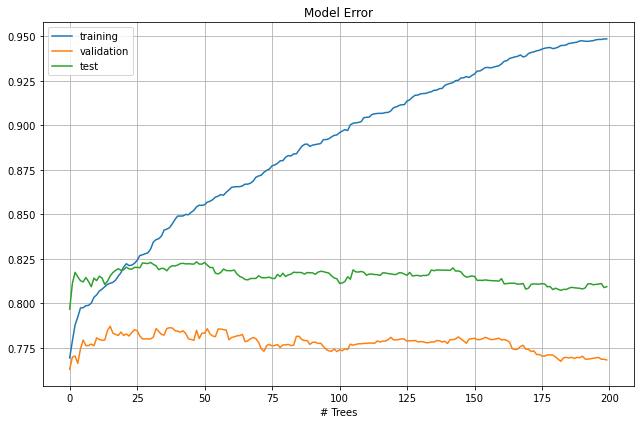

In [29]:
def compute_grads(preds, train_data): 
    global ds_to_queries
    global train_id
    global probs_with_labels
   
    #print("PREDS: min " + str(np.min(preds)) + " max " + str(np.max(preds)) + " mean " + str(np.mean(preds)) + " std " + str(np.std(preds)))
    #print("GAIN: min " + str(np.min(gain)) + " max " + str(np.max(gain)) + " mean " + str(np.mean(gain)) + " std " + str(np.std(gain)))
    #print("HESS: min " + str(np.min(hess)) + " max " + str(np.max(hess)) + " mean " + str(np.mean(hess)) + " std " + str(np.std(hess)))
    

params = {
    'learning_rate': 0.1,
    'num_leaves': 16,
    'min_data_in_leaf': 5,
    'metric': ['ndcg'],# ['None']
    'ndcg_eval_at': 10
}    

print("training lightgbm...")
#start = time.process_time()
lgbm_info = {}

lgbm_model = lightgbm.train(params, train_lgb, num_boost_round=200,
                            valid_sets   = [train_lgb, valid_lgb, test_lgb], 
                            valid_names  = ["train", "valid", "test"],
                            evals_result = lgbm_info,
                            verbose_eval = 10)


lgbm_info
print("training took " +  " s")
print("done")

# Plot the results
plt.figure(figsize=(9,6), tight_layout=True)
plt.plot(lgbm_info['train']['ndcg@10'], label='training')
plt.plot(lgbm_info['valid']['ndcg@10'], label='validation')
plt.plot(lgbm_info['test']['ndcg@10'], label='test')
plt.grid()
plt.legend()
plt.xlabel("# Trees")
plt.title("Model Error")

# Advanced example with custom optimization

In [13]:
# self-defined eval metric
# f(preds: array, train_data: Dataset) -> name: string, value: array, is_higher_better: bool
def mse_eval(preds, train_data):
    labels = train_data.get_label()
    
    avg_mse = 0.5 * np.mean( (labels-preds)**2 )
    
    return 'Custom-MSE', avg_mse, False

In [14]:
params = {
    'objective':'lambdarank', # what to optimize during training
    'max_position': 10,      # threshold used in optimizing lamdarank (NDCG)
    'learning_rate': 0.1,
    'num_leaves': 16,
    'min_data_in_leaf': 5,
    'metric': ['None'], #['ndcg'],       # what to use/print for evaluation
#    'ndcg_eval_at': 10
}    

lgbm_info = {}

lgbm_model = lightgbm.train(params, train_lgb, num_boost_round=100,
                            feval = mse_eval,
                            valid_sets   = [train_lgb, valid_lgb, test_lgb], 
                            valid_names  = ["train", "valid", "test"],
                            evals_result = lgbm_info,
                            verbose_eval = 10)


lgbm_info

[10]	train's Custom-MSE: 0.205613	valid's Custom-MSE: 0.220115	test's Custom-MSE: 0.20839
[20]	train's Custom-MSE: 0.248913	valid's Custom-MSE: 0.265374	test's Custom-MSE: 0.249906
[30]	train's Custom-MSE: 0.29572	valid's Custom-MSE: 0.314708	test's Custom-MSE: 0.29642
[40]	train's Custom-MSE: 0.342186	valid's Custom-MSE: 0.363317	test's Custom-MSE: 0.342601
[50]	train's Custom-MSE: 0.390545	valid's Custom-MSE: 0.413285	test's Custom-MSE: 0.392503
[60]	train's Custom-MSE: 0.432767	valid's Custom-MSE: 0.458568	test's Custom-MSE: 0.436704
[70]	train's Custom-MSE: 0.475747	valid's Custom-MSE: 0.503567	test's Custom-MSE: 0.480593
[80]	train's Custom-MSE: 0.506474	valid's Custom-MSE: 0.536395	test's Custom-MSE: 0.512592
[90]	train's Custom-MSE: 0.524846	valid's Custom-MSE: 0.557929	test's Custom-MSE: 0.533174
[100]	train's Custom-MSE: 0.543971	valid's Custom-MSE: 0.578401	test's Custom-MSE: 0.555043


{'test': defaultdict(list,
             {'Custom-MSE': [0.18569159362900378,
               0.1860745356583907,
               0.1878772673571102,
               0.18957170367386314,
               0.19225733486341115,
               0.19493902057995197,
               0.19783192599402008,
               0.20136876939300555,
               0.20510171249974554,
               0.20839014088665547,
               0.21222169078032999,
               0.21651233424616234,
               0.22072499125315867,
               0.22458760337924075,
               0.22861938356402445,
               0.23281549941705001,
               0.23730381831660713,
               0.24133734282877273,
               0.24569456739132337,
               0.24990616932287238,
               0.2546464513850338,
               0.2591873205111974,
               0.26398742244294743,
               0.2687699453299392,
               0.27345083426682393,
               0.27822059100543134,
               0.28287829573

Text(0.5, 1.0, 'Model Error')

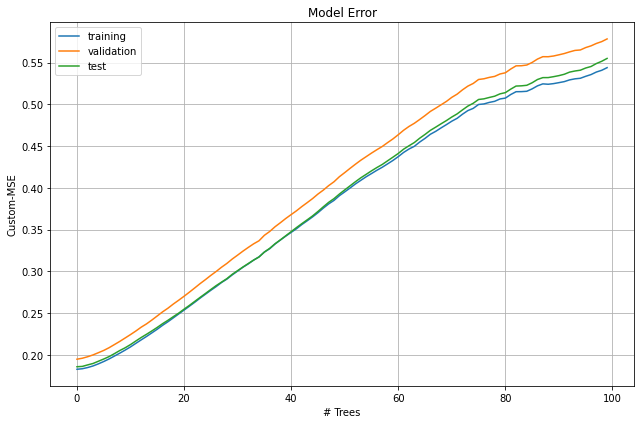

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6), tight_layout=True)

plt.plot(lgbm_info['train']['Custom-MSE'], label='training')
plt.plot(lgbm_info['valid']['Custom-MSE'], label='validation')
plt.plot(lgbm_info['test']['Custom-MSE'], label='test')

plt.grid()
plt.legend()
plt.xlabel("# Trees")
plt.ylabel("Custom-MSE")
plt.title("Model Error")

In [16]:
# self-defined objective function
# f(preds: array, train_data: Dataset) -> grad: array, hess: array
def mse_grads(preds, train_data):
    labels = train_data.get_label()
    #grad = labels - preds # this is the neg grad !!!
    grad = preds - labels
    hess = np.ones_like(grad)
    return grad, hess

In [17]:
params = {
#    'objective':'lambdarank', # what to optimize during training
#    'max_position': 10,      # threshold used in optimizing lamdarank (NDCG)
    'learning_rate': 0.1,
    'num_leaves': 16,
    'min_data_in_leaf': 5,
    'metric': ['None'], #['ndcg'],       # what to use/print for evaluation
#    'ndcg_eval_at': 10
# try printing ndcg and testing
}    

lgbm_info = {}

lgbm_model = lightgbm.train(params, train_lgb, num_boost_round=100,
                            feval = mse_eval,
                            fobj  = mse_grads,
                            valid_sets   = [train_lgb, valid_lgb, test_lgb], 
                            valid_names  = ["train", "valid", "test"],
                            evals_result = lgbm_info,
                            verbose_eval = 10)


lgbm_info

[10]	train's Custom-MSE: 0.128464	valid's Custom-MSE: 0.141064	test's Custom-MSE: 0.135847
[20]	train's Custom-MSE: 0.114554	valid's Custom-MSE: 0.132364	test's Custom-MSE: 0.128101
[30]	train's Custom-MSE: 0.107155	valid's Custom-MSE: 0.131445	test's Custom-MSE: 0.1269
[40]	train's Custom-MSE: 0.101932	valid's Custom-MSE: 0.131589	test's Custom-MSE: 0.127358
[50]	train's Custom-MSE: 0.0972769	valid's Custom-MSE: 0.132133	test's Custom-MSE: 0.127414
[60]	train's Custom-MSE: 0.0934872	valid's Custom-MSE: 0.132439	test's Custom-MSE: 0.127981
[70]	train's Custom-MSE: 0.0899491	valid's Custom-MSE: 0.132325	test's Custom-MSE: 0.127874
[80]	train's Custom-MSE: 0.0866794	valid's Custom-MSE: 0.132665	test's Custom-MSE: 0.127979
[90]	train's Custom-MSE: 0.0838531	valid's Custom-MSE: 0.132624	test's Custom-MSE: 0.127453
[100]	train's Custom-MSE: 0.0810122	valid's Custom-MSE: 0.133004	test's Custom-MSE: 0.127935


{'test': defaultdict(list,
             {'Custom-MSE': [0.1770538634296627,
               0.16762446438808362,
               0.16020776641720927,
               0.15415692413279997,
               0.14958485076859282,
               0.14572378085500665,
               0.14239645540084234,
               0.14000692779247162,
               0.13798710025519675,
               0.13584689241967207,
               0.1346084389728884,
               0.13366318334654062,
               0.13262903034816237,
               0.13169126596065214,
               0.13093248336982416,
               0.1301107337723715,
               0.12938515175209328,
               0.1290160163496682,
               0.12851754160216433,
               0.12810140885029447,
               0.1281502747363359,
               0.1278432640568267,
               0.12774848908843417,
               0.12762237322280615,
               0.1274187563153728,
               0.1272465649808677,
               0.12725824893339

Text(0.5, 1.0, 'Model Error')

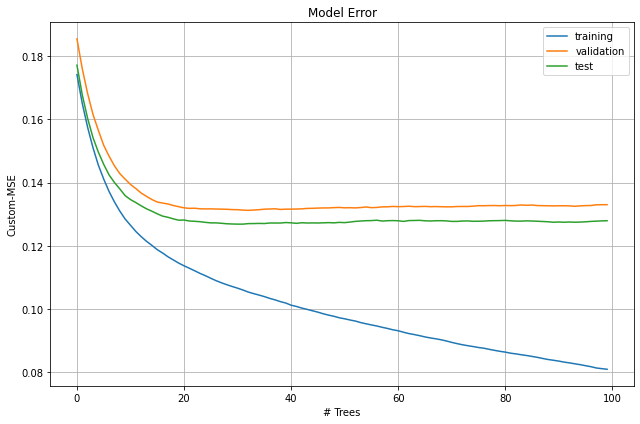

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6), tight_layout=True)

plt.plot(lgbm_info['train']['Custom-MSE'], label='training')
plt.plot(lgbm_info['valid']['Custom-MSE'], label='validation')
plt.plot(lgbm_info['test']['Custom-MSE'], label='test')

plt.grid()
plt.legend()
plt.xlabel("# Trees")
plt.ylabel("Custom-MSE")
plt.title("Model Error")

# Suggestion

If you want/need to be fast, use cython to implement your objective and evaluation functions.